# Load CSV DATA

In [16]:
# Leer el archivo CSV
ruta_csv = "train.csv"
df = pd.read_csv(ruta_csv)

# Mostrar las primeras filas y la información del DataFrame
display(df.head())
display(df.info())
display(df.isnull().sum())

# Dividir las características (X) y la variable objetivo (y)
X = df.drop('SalePrice', axis=1)  # Ajusta el nombre de la variable objetivo según tu caso
y = df['SalePrice']

# Convertir las variables categóricas en X a valores numéricos
# Usamos LabelEncoder para convertir las columnas categóricas a valores numéricos
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Asegúrate de que la variable objetivo también sea numérica
y = label_encoder.fit_transform(y)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

None

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# Load CSV DATA

## 1. Utilice los modelos con el conjunto de prueba y determine la eficiencia del algoritmo para predecir y clasificar

In [17]:
# Modelos
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Entrenamiento de modelos
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## 6. Predicciones y evalución

Precisión del Árbol de Decisión: 0.010273972602739725
Precisión del Random Forest: 0.00684931506849315


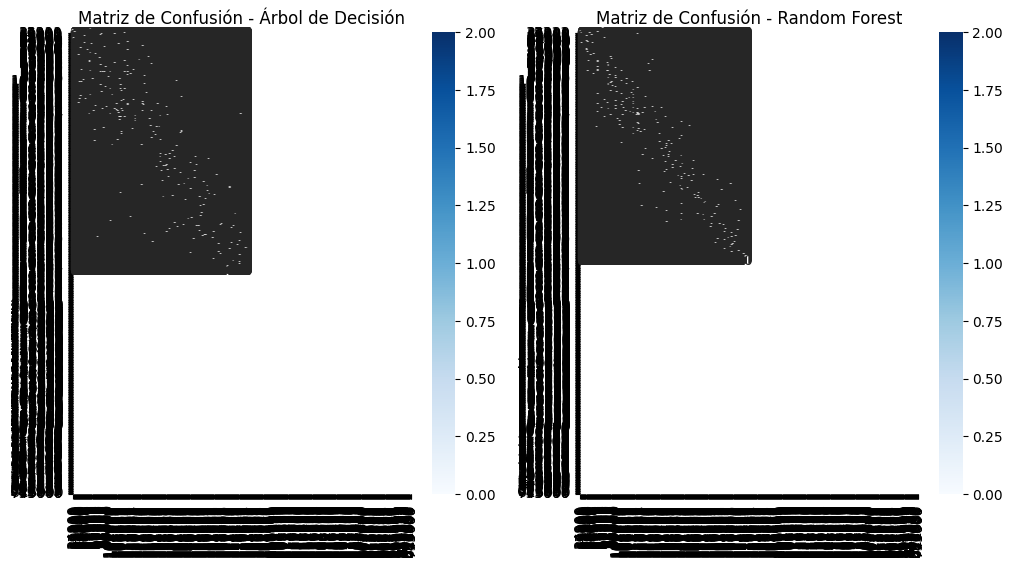


Reporte de Clasificación para Árbol de Decisión:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          10       1.00      1.00      1.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         0
          26       0.00      0.00      0.00         1
          28       0.00      0.

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In [18]:
# Predicciones
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Evaluación de la precisión
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"Precisión del Árbol de Decisión: {dt_accuracy}")
print(f"Precisión del Random Forest: {rf_accuracy}")

# Matriz de Confusión para ambos modelos
dt_cm = confusion_matrix(y_test, dt_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

# Visualización de las matrices de confusión
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusión - Árbol de Decisión')

plt.subplot(1, 2, 2)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusión - Random Forest')

plt.show()

# Reporte de clasificación para ambos modelos
print("\nReporte de Clasificación para Árbol de Decisión:")
print(classification_report(y_test, dt_pred))

print("\nReporte de Clasificación para Random Forest:")
print(classification_report(y_test, rf_pred))


## 8. Modelo usando validación cruzada

In [21]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# Cargar los datos
data = load_iris()
X = data.data
y = data.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo anterior (RandomForest)
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Crear el nuevo modelo (Logistic Regression)
model_lr = LogisticRegression(max_iter=200, random_state=42)

# Validación cruzada para el modelo de regresión logística
scores_lr = cross_val_score(model_lr, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f"Scores de validación cruzada para el modelo de regresión logística: {scores_lr}")
print(f"Media de validación cruzada: {scores_lr.mean()}")

# Evaluar el modelo anterior (RandomForest)
model_rf.fit(X_train, y_train)
score_rf = model_rf.score(X_test, y_test)
print(f"Exactitud del modelo RandomForest en datos de prueba: {score_rf}")

# Comparar los resultados
if scores_lr.mean() > score_rf:
    print("El modelo con validación cruzada (Regresión Logística) funciona mejor.")
else:
    print("El modelo anterior (RandomForest) funciona mejor.")


Scores de validación cruzada para el modelo de regresión logística: [1.         0.9047619  0.95238095 1.         0.95238095]
Media de validación cruzada: 0.9619047619047618
Exactitud del modelo RandomForest en datos de prueba: 1.0
El modelo anterior (RandomForest) funciona mejor.


## 9. Valores de los hiperparámetros

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar los datos de ejemplo (en este caso el conjunto Iris)
X, y = load_iris(return_X_y=True)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Parámetros para RandomForest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Crear el modelo RandomForest
rf_model = RandomForestClassifier(random_state=42)

# Realizar GridSearchCV para RandomForest
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Mejor modelo y exactitud
print("Mejores parámetros para RandomForest:", grid_search_rf.best_params_)
rf_best_model = grid_search_rf.best_estimator_
rf_test_accuracy = accuracy_score(y_test, rf_best_model.predict(X_test))
print("Exactitud del modelo optimizado RandomForest en datos de prueba:", rf_test_accuracy)

# Parámetros para LogisticRegression
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],  # Se corrigió el valor de penalty, ahora es 'l2'
    'solver': ['lbfgs', 'liblinear']
}

# Crear el modelo LogisticRegression
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Realizar GridSearchCV para LogisticRegression
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, cv=5)
grid_search_lr.fit(X_train, y_train)

# Mejor modelo y exactitud
print("Mejores parámetros para LogisticRegression:", grid_search_lr.best_params_)
lr_best_model = grid_search_lr.best_estimator_
lr_test_accuracy = accuracy_score(y_test, lr_best_model.predict(X_test))
print("Exactitud del modelo optimizado LogisticRegression en datos de prueba:", lr_test_accuracy)

# Comparar cuál modelo funciona mejor
if rf_test_accuracy > lr_test_accuracy:
    print("El modelo RandomForest optimizado funciona mejor.")
else:
    print("El modelo LogisticRegression optimizado funciona mejor.")


Mejores parámetros para RandomForest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Exactitud del modelo optimizado RandomForest en datos de prueba: 1.0
Mejores parámetros para LogisticRegression: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Exactitud del modelo optimizado LogisticRegression en datos de prueba: 1.0
El modelo LogisticRegression optimizado funciona mejor.


# 4 Modelo de clasificación


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Ejemplo de conjunto de datos con casas
data = pd.DataFrame({
    'Precio': [120000, 250000, 450000, 750000, 180000, 320000, 600000, 900000, 150000, 350000],
    'Tamaño': [80, 120, 150, 180, 90, 130, 160, 200, 85, 140],
    'Ubicación': [1, 2, 2, 3, 1, 2, 3, 3, 1, 2]  # Representación de variable categórica
})

# Categorizamos la columna 'Precio' en 3 categorías: 'barata', 'media', 'cara'
data['Precio_Categoria'] = pd.cut(data['Precio'], bins=[0, 200000, 500000, float('inf')],
                                  labels=['barata', 'media', 'cara'])

# Dividir el conjunto de datos en características (X) y variable respuesta (y)
X = data.drop(columns=['Precio', 'Precio_Categoria'])  # Características
y = data['Precio_Categoria']  # Variable categórica de respuesta

# Codificar la variable categórica en valores numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Codifica las etiquetas como 0, 1, 2

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Parámetros para RandomForest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Crear y ajustar el modelo RandomForest
rf_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3)  # Usar 3 pliegues
grid_search_rf.fit(X_train, y_train)

# Mejor modelo y exactitud de RandomForest
print("Mejores parámetros para RandomForest:", grid_search_rf.best_params_)
rf_best_model = grid_search_rf.best_estimator_
rf_test_accuracy = accuracy_score(y_test, rf_best_model.predict(X_test))
print("Exactitud del modelo optimizado RandomForest en datos de prueba:", rf_test_accuracy)

# Parámetros para LogisticRegression
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

# Crear y ajustar el modelo LogisticRegression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, cv=3)  # Usar 3 pliegues
grid_search_lr.fit(X_train, y_train)

# Mejor modelo y exactitud de LogisticRegression
print("Mejores parámetros para LogisticRegression:", grid_search_lr.best_params_)
lr_best_model = grid_search_lr.best_estimator_
lr_test_accuracy = accuracy_score(y_test, lr_best_model.predict(X_test))
print("Exactitud del modelo optimizado LogisticRegression en datos de prueba:", lr_test_accuracy)

# Comparar cuál modelo funciona mejor
if rf_test_accuracy > lr_test_accuracy:
    print("El modelo RandomForest optimizado funciona mejor.")
else:
    print("El modelo LogisticRegression optimizado funciona mejor.")


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
